In [2]:
# Import the necessary libraries
import torch
import torch.nn as nn
# To plot the figure
import matplotlib.pyplot as plt

# Ad-Hoc Optimizer

In [3]:
# Import the necessary libraries
import torch
import torch.nn as nn

# MomentumOptimizer
class MomentumOptimizer(torch.optim.Optimizer):
    
    # Init Method:
    def __init__(self, params, lr=1e-3, momentum=0.9):
        super(MomentumOptimizer, self).__init__(params, defaults={'lr': lr})
        self.momentum = momentum
        self.state = dict()
        for group in self.param_groups:
            for p in group['params']:
                self.state[p] = dict(mom=torch.zeros_like(p.data))
    
    # Step Method
    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                if p not in self.state:
                    self.state[p] = dict(mom=torch.zeros_like(p.data))
                mom = self.state[p]['mom']
                mom = self.momentum * mom - group['lr'] * p.grad.data
                p.data += mom

In [4]:
# Define a simple model
model = nn.Linear(2, 2)

# Define a loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = MomentumOptimizer(model.parameters(), lr=1e-3, momentum=0.9)

In [5]:
# Generate some random data
X = torch.randn(100, 2)
y = torch.randn(100, 2)

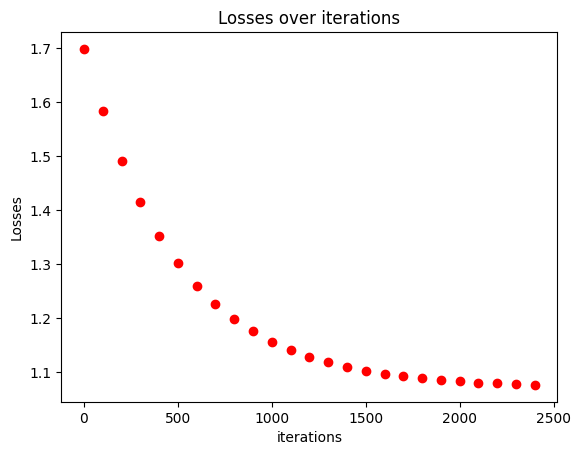

In [6]:
# Training loop
for i in range(2500):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Plot losses
    if i%100 ==0:
        plt.plot(i,loss.item(),'ro-')
    
    loss.backward()
    optimizer.step()
    
plt.title('Losses over iterations')
plt.xlabel('iterations')
plt.ylabel('Losses')
plt.show()